### **Regression inputs and outputs**
   Regression analysis is a set of statistical processes for estimating the relationships betweeb a `dependent variable` and one or more `independent variables`


1. Independent variable often called `predictors`, `covariates`, `features`, `input feature`
2. Dependent variable often called `outcome variable`, `output features`



In [196]:
import tensorflow as tf


**Creating data to view and fit**

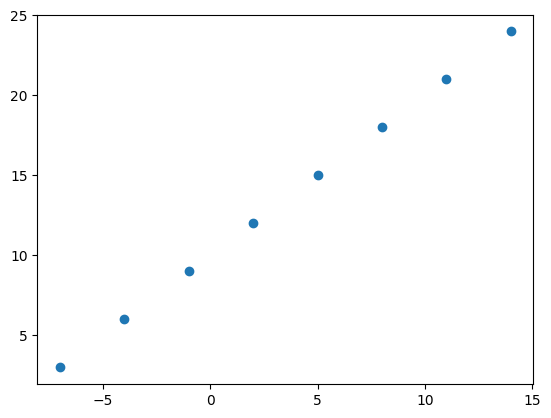

In [197]:
import numpy as np
import matplotlib.pyplot as plt
#Create features
x = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3.,6., 9., 12., 15, 18., 21., 24.])
#visualize it
plt.scatter(x,y)

Turn numpy array into tensors

In [198]:
x=tf.range(-100, 100, 4)
y = x + 10



In [199]:
#split the data into The Three sets (see blow..)

x_train = x[:40]
x_test = x[40:]
y_train = y[:40]
y_test = y[40:]



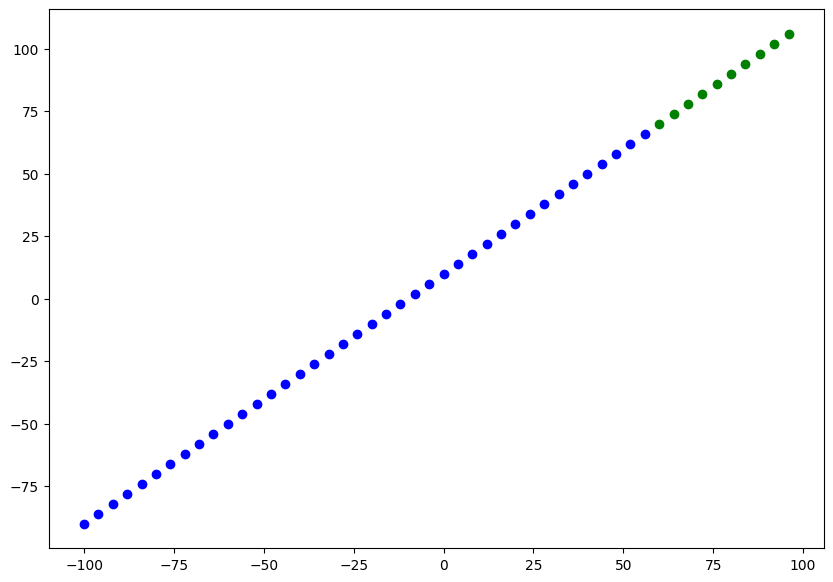

In [200]:
#Visualizing the data
plt.figure(figsize = (10,7))
#train data
plt.scatter(x_train, y_train, c="b", label="Training data")
plt.scatter(x_test, y_test, c="g", label="Test Data")

**Modeling with TensorFlow**
1. Creating a model - define the inout and output layers as well as the hidden layers of deep learning model
2. Compiling a model - define the loss function(in ohters word, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model)
3. Fitting a model - letting the model try to find patterns between X & Y (features and labels)


In [201]:
#Set random seed
tf.random.set_seed(1)

# 1. Create a model using the sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, name="input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))


#2. Compile the model
model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mse"])

#2. Fit the model
model.fit(tf.expand_dims(x_train,axis=-1), y_train, epochs=100, verbose=0)

1. `Total params`  -  total numeber of parameters in the model.
2. `Trainable params` - these are the parameters(patterns) the model can update as it trains.
3. `Non-trainable params` - these parameters aren't updated during training (this is typically when you bring in already learn patterns or params from other models during `transfer learning `).

In [202]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


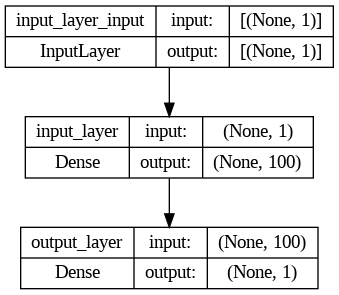

In [203]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

**The Three Sets**
1. `Training set` - the model learns from this set, which is typically 70 to 80 % of the total data you have available.
2. `Validation set` - the model get tuned on this data, which is typically 10-15 % of the data available.
3. `Test set` - the model gets evaluated o this data to test what is has learned,
this set is typically 10-15 % of the total data available

In [204]:
#Evaluate the model
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 179ms/step - loss: 1.5098e-05 - mse: 1.5098e-05


[1.5098374205990694e-05, 1.5098374205990694e-05]

In [205]:
# Make a prediction with our model
predictons = model.predict(x_test)

1/1 [==============================] - 0s 92ms/step


**Improving the model**
we can inprove the model, by altering the steps we took to create a model
1. **Create model**- here we might add more layers. increase the numbers of hidden units(also called `neurons`) withing each of the hidden layers,change the `activation function`of each layer.
2. **Compiling a model** - here we might change the optimization or perhaps the `learing rate` of optimization function.
3. **Fitting a model** - here we might fit the model for more `epochs` or on more data.

**Common ways to improve a deep model
1. Adding layers
2. Increase the number of hidden units(neurons)
3. Change the `activation function`
4. Changing the `Learning Rate`- **The Most important HyperParameters**
5. Fitting on more data
6. Fitting for longer(increase `epochs`)


In [206]:
def Plot_prediction(train_ds=tf.expand_dims(x_train,axis=-1),
                    training_label=y_train,
                    test_ds=x_test,
                    test_label=y_test,
                    predictions=predictons):
  """
  Plot training data , test data and compare them to predictions
  """
  plt.figure(figsize=(15,8))
  plt.scatter(train_ds,training_label, c='b', label="Training data")
  plt.scatter(test_ds, test_label, c='g', label = "Testing data")
  plt.scatter(test_ds, predictions, c='red', label ='Predictons')
  plt.legend();




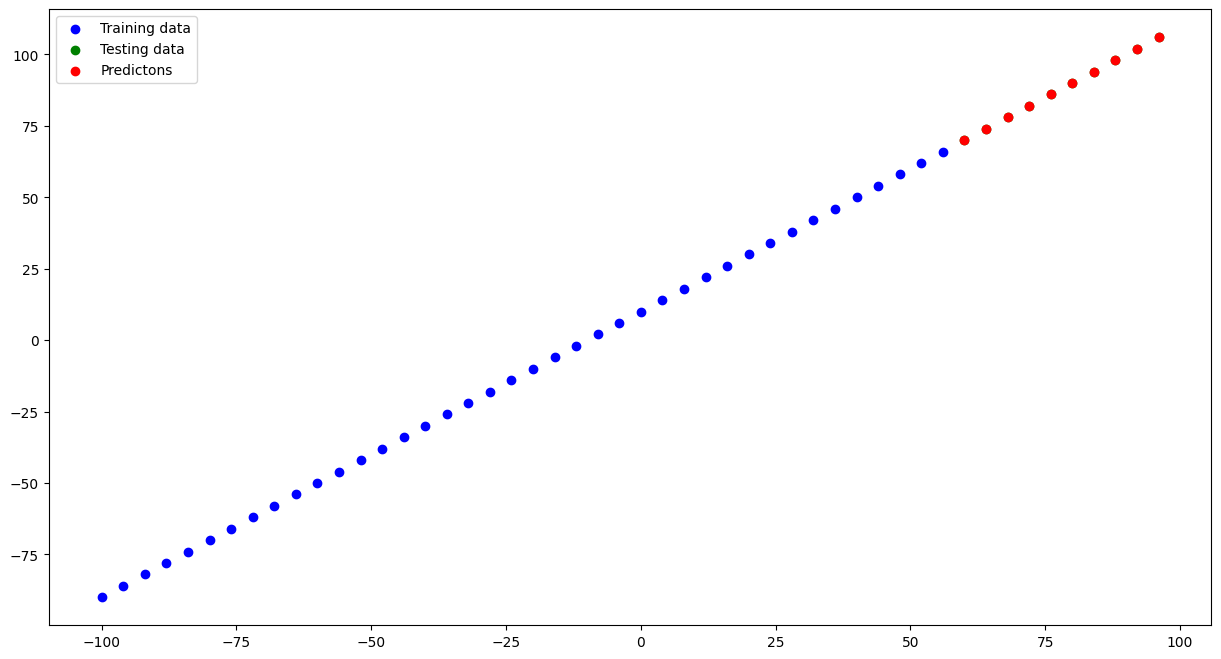

In [207]:
Plot_prediction()

In [208]:
model.predict([125.0])

1/1 [==============================] - 0s 94ms/step


array([[134.99617]], dtype=float32)

**Evaluating our model's predictions with regression evaluation metrics**
1. MAE - mean absolute error
2. MSE - mean square error

In [210]:
#Saving the model
model.save('simple_model.keras')